In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
dataset=sns.load_dataset('taxis')

In [5]:
dataset

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 502.6+ KB


In [33]:
data=dataset.drop(['dropoff_borough','pickup','passengers','distance','dropoff','payment','color','pickup_zone','dropoff_zone','pickup_borough','tolls'],axis=1)

In [34]:
data

,fare,tip,total
0,7.0,2.15,12.95
1,5.0,0.00,9.30
2,7.5,2.36,14.16
3,27.0,6.15,36.95
4,9.0,1.10,13.40
...,...,...,...
6428,4.5,1.06,6.36
6429,58.0,0.00,58.80
6430,16.0,0.00,17.30
6431,6.0,0.00,6.80


In [35]:
x=data.iloc[:,-1].values.reshape(-1,1)
y=data.iloc[:,0].values.reshape(-1,1)

In [36]:
x

array([[12.95],
       [ 9.3 ],
       [14.16],
       ...,
       [17.3 ],
       [ 6.8 ],
       [20.16]])

In [37]:
y

array([[ 7. ],
       [ 5. ],
       [ 7.5],
       ...,
       [16. ],
       [ 6. ],
       [15. ]])

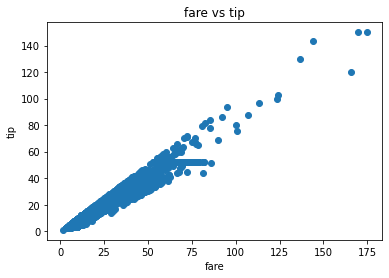

In [38]:
plt.scatter(x,y)
plt.title('fare vs tip')
plt.xlabel('fare')
plt.ylabel('tip')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
x_train.shape

(5146, 1)

In [42]:
x_test.shape

(1287, 1)

In [43]:
y_train.shape

(5146, 1)

In [44]:
y_test.shape

(1287, 1)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm=LinearRegression()

In [47]:
lm.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred = lm.predict(x_test)

In [49]:
y_pred

array([[61.99931618],
       [16.87933504],
       [ 5.62372015],
       ...,
       [ 6.29011757],
       [ 4.81104038],
       [ 4.40470049]])

In [50]:
check= pd.DataFrame(x_test,columns=['taxis'])

In [51]:
check['Actual tip'] = y_test

In [52]:
check['predicted tip']=y_pred

In [53]:
check

,taxis,Actual tip,predicted tip
0,78.67,52.0,61.999316
1,23.15,16.0,16.879335
2,9.30,6.0,5.623720
3,10.38,5.0,6.501414
4,24.96,17.0,18.350285
...,...,...,...
1282,11.54,7.0,7.444123
1283,6.80,5.5,3.592021
1284,10.12,5.5,6.290118
1285,8.30,5.0,4.811040


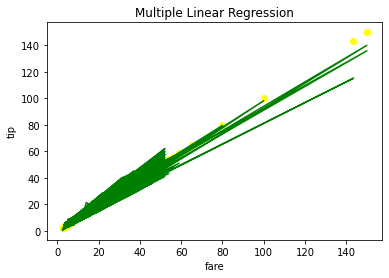

In [61]:
plt.scatter(y_test,y_test,color='yellow')
plt.plot(y_test,y_pred,color="green")
plt.title('Multiple Linear Regression')
plt.xlabel('fare')
plt.ylabel('tip')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [56]:
mean_squared_error(y_test,y_pred)

6.685929214070761

In [57]:
mean_absolute_error(y_test,y_pred)

1.7977253516329683

In [58]:
r2_score(y_test,y_pred)

0.9574128732552697